In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from flask import request
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import datetime as dt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import timedelta


In [ ]:

#page = requests.get('https://forecast.weather.gov/MapClick.php?lat=47.19044000000008&lon=-122.29563999999999#.Xq3cLZl7lPY')
#soup = BeautifulSoup(page.text, 'lxml')
#print(soup)


In [ ]:
url_request = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
data = pd.DataFrame(url_json['features'])
data

,attributes,geometry
0,"{'OBJECTID': 1, 'Province_State': None, 'Count...","{'x': 67.70995300000004, 'y': 33.93911000000003}"
1,"{'OBJECTID': 2, 'Province_State': None, 'Count...","{'x': 20.168300000000045, 'y': 41.15330000000006}"
2,"{'OBJECTID': 3, 'Province_State': None, 'Count...","{'x': 1.6596000000000686, 'y': 28.033900000000..."
3,"{'OBJECTID': 4, 'Province_State': None, 'Count...","{'x': 1.5218000000000416, 'y': 42.50630000000007}"
4,"{'OBJECTID': 5, 'Province_State': None, 'Count...","{'x': 17.87390000000005, 'y': -11.202699999999..."
...,...,...
765,"{'OBJECTID': 766, 'Province_State': 'Ohio', 'C...","{'x': -82.76491499999997, 'y': 40.388783000000..."
766,"{'OBJECTID': 767, 'Province_State': 'Alabama',...","{'x': -86.90229999999997, 'y': 32.31820000000005}"
767,"{'OBJECTID': 768, 'Province_State': 'North Car...","{'x': -79.80641899999995, 'y': 35.630066000000..."
768,"{'OBJECTID': 769, 'Province_State': 'District ...","{'x': -77.02681699999994, 'y': 38.89743800000008}"


## Data Wrangling


In [ ]:


# a. data transformation

covid_data_list = data['attributes'].tolist()
data_covid = pd.DataFrame(covid_data_list)
data_covid.set_index('OBJECTID')
data_covid = data_covid[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
data_covid.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
data_covid['State'].fillna(value = '', inplace = True)
data_covid.columns
data_covid


,State,Country,Last Update,Lat,Long,Confirmed,Recovered,Deaths,Active
0,,Afghanistan,1.628864e+12,33.939110,67.709953,151563,0,6988,0
1,,Albania,1.628864e+12,41.153300,20.168300,134761,0,2460,0
2,,Algeria,1.628864e+12,28.033900,1.659600,185042,0,4695,0
3,,Andorra,1.628864e+12,42.506300,1.521800,14924,0,129,0
4,,Angola,1.628864e+12,-11.202700,17.873900,44174,0,1070,0
...,...,...,...,...,...,...,...,...,...
765,Ohio,US,1.628864e+12,40.388783,-82.764915,1152590,0,20580,0
766,Alabama,US,1.628864e+12,32.318200,-86.902300,623919,0,11724,0
767,North Carolina,US,1.628864e+12,35.630066,-79.806419,1100786,0,13806,0
768,District of Columbia,US,1.628864e+12,38.897438,-77.026817,52005,0,1150,0


In [ ]:
# b.  data cleaning

def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)

data_covid = data_covid.dropna(subset = ['Last Update'])
data_covid['Last Update'] = data_covid['Last Update']/1000
data_covid['Last Update'] = data_covid['Last Update'].apply(convert_time)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### EDA and Data Visualization

In [ ]:
# a. Top 10 confirmed countries (Bubble plot)

top10_confirmed = pd.DataFrame(data_covid.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = True))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')
fig1.show()

In [ ]:
# b. Top 10 deaths countries (h-Bar plot)

top10_deaths_countries = pd.DataFrame(data_covid.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths_countries, x = 'Deaths', y = top10_deaths_countries.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['green','red'], title = 'Top 10 Death Cases Countries')
fig2.show()

In [ ]:
top10_deaths_countries.head()

,Deaths
Country,
Indonesia,115096
Colombia,123097
Italy,128334
United Kingdom,131016
Russia,165996


In [ ]:
data_covid.head()

,State,Country,Last Update,Lat,Long,Confirmed,Recovered,Deaths,Active
0,,Afghanistan,2021-08-13 14:21:26,33.93911,67.709953,151563,0,6988,0
1,,Albania,2021-08-13 14:21:26,41.15330,20.168300,134761,0,2460,0
2,,Algeria,2021-08-13 14:21:26,28.03390,1.659600,185042,0,4695,0
3,,Andorra,2021-08-13 14:21:26,42.50630,1.521800,14924,0,129,0
4,,Angola,2021-08-13 14:21:26,-11.20270,17.873900,44174,0,1070,0


In [ ]:
# c. Top 10 recovered countries (Bar plot)

top10_recovered_countries = pd.DataFrame(data_covid.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered_countries, x=top10_recovered_countries.index ,y='Recovered' , height = 300, color = 'Recovered',
             title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()





In [ ]:
top10_recovered_countries.head()

,Recovered
Country,
Austria,0
Australia,0
Armenia,0
Argentina,0
Antigua and Barbuda,0


In [ ]:
# d. Top 10 active countries

top10_active_countries = pd.DataFrame(data_covid.groupby('Country')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active_countries, y = top10_active_countries.index ,x='Active' , height = 600, color = 'Active', orientation = 'h',
             title = 'Top 10 Active Cases Countries')
fig4.show()

In [ ]:
top10_active_countries.head()

,Active
Country,
Afghanistan,0
Albania,0
Algeria,0
Andorra,0
Angola,0


Part 2 — Ranking most affected States in largely affected Countries:EDA for ranking states in largely affected Countries:


In [ ]:
# USA
topstates_us = data_covid['Country'] == 'US'
topstates_us = data_covid[topstates_us].nlargest(5, 'Confirmed')


In [ ]:
# USA 
fig5 = go.Figure(data = [
   
    go.Bar(name = 'Death Cases', x = topstates_us['Deaths'], y = topstates_us['State'], orientation = 'h')
])
fig5.update_layout(title = 'Most Affected States in USA', height = 500)
fig5.show()

 COVID-19 cases worldwide:EDA for COVID-19 cases worldwide:

In [ ]:
#url_request = requests.get("https://covid19.who.int/")
#url_json = url_request.json()
#who_data = pd.DataFrame(url_json['features'])
#who_data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
time_series_data = pd.read_csv('/content/drive/MyDrive/WHO-COVID-19-global-data.csv')
time_series_data['Date_reported'] = pd.to_datetime(time_series_data['Date_reported'])

In [ ]:
time_series_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
time_series_dates = time_series_data.groupby('Date_reported').sum()
time_series

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
# Cumulative cases
fig11 = go.Figure()
fig11.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Cumulative_cases'], fill = 'tonexty',
                          line_color = 'blue'))
fig11.update_layout(title = 'Cumulative Cases Worldwide')
fig11.show()
time_series

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
#Cumulative death cases worldwide
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Cumulative_deaths'], fill = 'tonexty',
                          line_color = 'red'))
fig12.update_layout(title = 'Cumulative Deaths Worldwide')
fig12.show()


In [ ]:
#Daily new cases worldwide
fig13 = go.Figure()
fig13.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['New_cases'], fill = 'tonexty',
                          line_color = 'gold'))
fig13.update_layout(title = 'Daily New Cases Worldwide')
fig13.show()
time_series

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
#Daily death cases worldwide:
fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['New_deaths'], fill = 'tonexty',
                          line_color = 'hotpink'))
fig14.update_layout(title = 'Daily Death Cases Worldwide')
fig14.show()

In [ ]:
time_series

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
#EDA for Most affected countries over time:
# USA 
# USA 

time_series_us = time_series['Country'] == ('United States of America')
time_series_us = time_series[time_series_us]

#Canada

time_series_can = time_series['Country'] == ('Canada')
time_series_can = time_series[time_series_can]

# Brazil
time_series_brazil = time_series['Country'] == ('Brazil')
time_series_brazil = time_series[time_series_brazil]

# India
time_series_india = time_series['Country'] == ('India')
time_series_india = time_series[time_series_india]

# Russia
time_series_russia = time_series['Country'] == ('Russia')
time_series_russia = time_series[time_series_russia]

# Peru
time_series_peru = time_series['Country'] == ('Peru')
time_series_peru = time_series[time_series_peru]



In [ ]:
fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us['Cumulative_cases'], name = 'USA'))
fig15.add_trace(go.Line(x = time_series_can['Date_reported'], y = time_series_can['Cumulative_cases'], name = 'Canada'))
fig15.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil['Cumulative_cases'], name = 'Brazil'))
fig15.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india['Cumulative_cases'], name = 'India'))
fig15.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia['Cumulative_cases'], name = 'Russia'))
fig15.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru['Cumulative_cases'], name = 'Peru'))

fig15.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Cases')

fig15.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
#Most affected Countries’ daily new cases over time
fig17 = go.Figure()

fig17.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us['New_cases'], name = 'USA'))
fig17.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil['New_cases'], name = 'Brazil'))
fig17.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india['New_cases'], name = 'India'))
fig17.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia['New_cases'], name = 'Russia'))
fig17.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru['New_cases'], name = 'Peru'))

fig17.update_layout(title = 'Time Series of Most Affected countries"s Daily New Cases')

fig17.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
#Most affected Countries’ daily death cases:
fig18 = go.Figure()

fig18.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us['New_deaths'], name = 'USA'))
fig18.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil['New_deaths'], name = 'Brazil'))
fig18.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india['New_deaths'], name = 'India'))
fig18.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia['New_deaths'], name = 'Russia'))
fig18.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru['New_deaths'], name = 'Peru'))

fig18.update_layout(title = 'Time Series of Most Affected countries"s Daily Death Cases')

fig18.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
time_series

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
#WHO Region-Wise Case Distribution:
who = pd.read_csv('/content/drive/MyDrive/archive/country_wise_latest.csv')
who_region = pd.DataFrame(who.groupby('WHO Region')['Confirmed'].sum())

labels = who_region.index
values = who_region['Confirmed']

fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])

fig9.update_layout(title = 'WHO Region-Wise Case Distribution', width = 700, height = 400, 
                   margin = dict(t = 0, l = 0, r = 0, b = 0))

fig9.show()

In [ ]:
case_dist = who

# US
dist_us = case_dist['Country/Region'] == 'US'
dist_us = case_dist[dist_us][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Brazil
dist_brazil = case_dist['Country/Region'] == 'Brazil'
dist_brazil = case_dist[dist_brazil][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# India
dist_india = case_dist['Country/Region'] == 'India'
dist_india = case_dist[dist_india][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Russia
dist_russia = case_dist['Country/Region'] == 'Russia'
dist_russia = case_dist[dist_russia][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



Text(0.5, 0.98, 'Case Classification of Most Affected Countries')

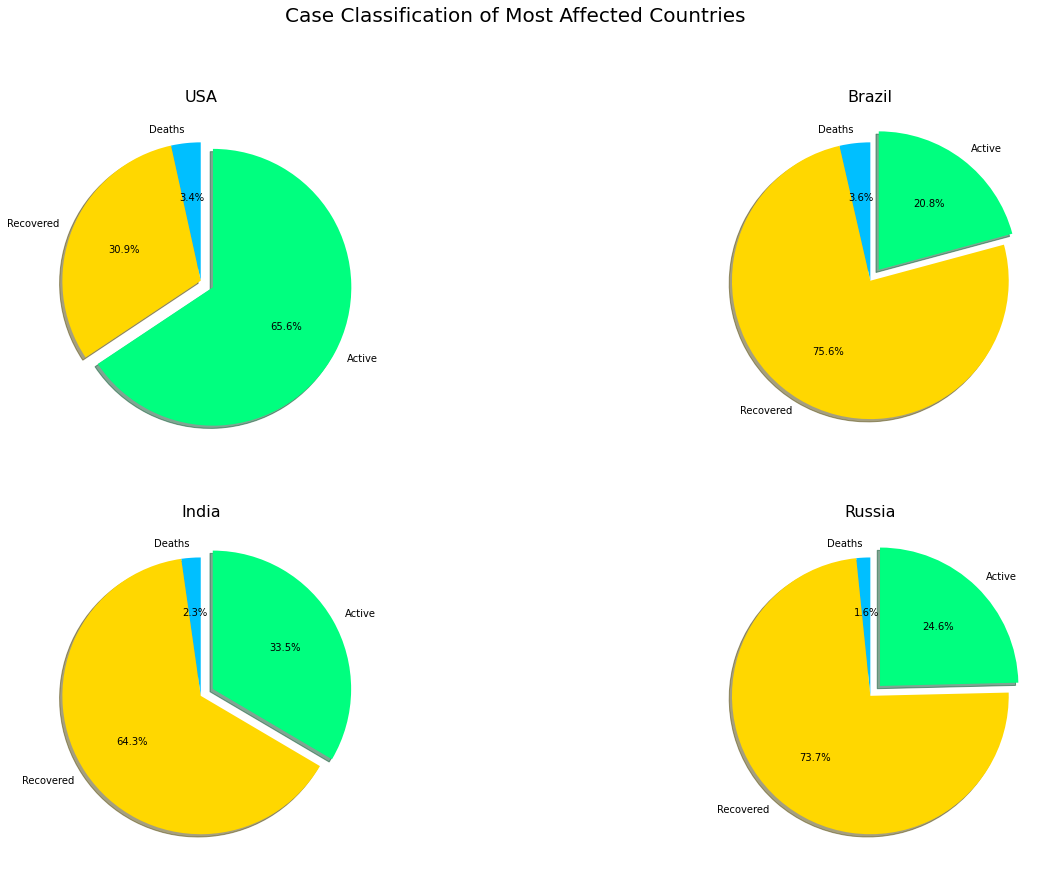

In [ ]:
fig = plt.figure(figsize = (22,14))
colors_series = ['deepskyblue','gold','springgreen','coral']
explode = (0,0,0.1)

plt.subplot(221)
plt.pie(dist_us, labels = dist_us.columns, colors = colors_series, explode = explode,startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('USA', fontsize = 16)

plt.subplot(222)
plt.pie(dist_brazil, labels = dist_brazil.columns, colors = colors_series, explode = explode,startangle = 90,autopct = '%.1f%%',
       shadow = True)
plt.title('Brazil', fontsize = 16)

plt.subplot(223)
plt.pie(dist_india, labels = dist_india.columns, colors = colors_series, explode = explode, startangle = 90, autopct = '%.1f%%',
       shadow = True)
plt.title('India', fontsize = 16)

plt.subplot(224)
plt.pie(dist_russia, labels = dist_russia.columns, colors = colors_series, explode = explode, startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('Russia', fontsize = 16)

plt.suptitle('Case Classification of Most Affected Countries', fontsize = 20)

In [ ]:
negative_positive = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
negative_positive = negative_positive.groupby('continent')[['total_cases','total_tests']].sum()

explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']
negative_positive

,total_cases,total_tests
continent,,
Africa,1.218456e+09,7.428183e+09
Asia,9.871043e+09,1.323244e+11
Europe,1.011846e+10,1.270403e+11
North America,9.357134e+09,1.169125e+11
Oceania,1.462009e+07,3.670256e+09
South America,6.410117e+09,1.105008e+10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



Text(0.5, 0.98, 'Continent-Wise Tested Positive & Negative Percentage Composition')

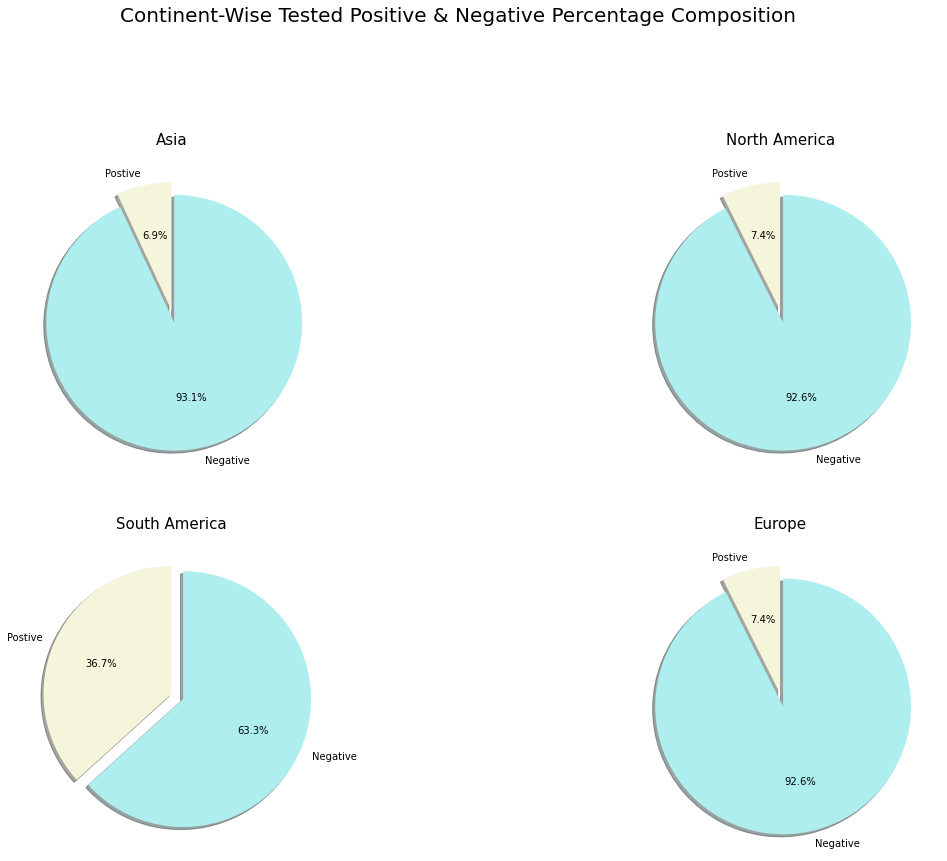

In [ ]:
fig = plt.figure(figsize = (20,20))

plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)

plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'South America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)


In [ ]:
data.head()


,attributes,geometry
0,"{'OBJECTID': 1, 'Province_State': None, 'Count...","{'x': 67.70995300000004, 'y': 33.93911000000003}"
1,"{'OBJECTID': 2, 'Province_State': None, 'Count...","{'x': 20.168300000000045, 'y': 41.15330000000006}"
2,"{'OBJECTID': 3, 'Province_State': None, 'Count...","{'x': 1.6596000000000686, 'y': 28.033900000000..."
3,"{'OBJECTID': 4, 'Province_State': None, 'Count...","{'x': 1.5218000000000416, 'y': 42.50630000000007}"
4,"{'OBJECTID': 5, 'Province_State': None, 'Count...","{'x': 17.87390000000005, 'y': -11.202699999999..."


In [ ]:
X = time_series.iloc[: ,:3].values
y = time_series.iloc[: ,:-5].values

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


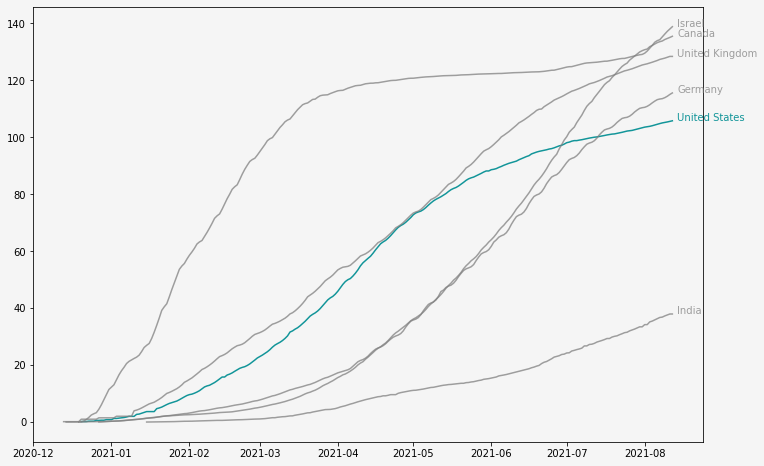

In [ ]:
# Step 1: Load the data
df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_vaccinations_per_hundred'], 
    parse_dates=['date'])

countries = ['United States', 'Germany', 'United Kingdom', 'Israel', 'Canada', 'India']
df = df[df['location'].isin(countries)]





# Step 2: Summarize the data
pivot = pd.pivot_table(
    data=df,                                    
    index='date',                               
    columns='location',                         
    values='total_vaccinations_per_hundred',    
    aggfunc='mean',                             
    )

pivot = pivot.fillna(method='ffill')

# Step 3: Set up key variables for the visualization
main_country = 'United States'
colors = {country:('grey' if country!= main_country else '#129599') for country in countries}
alphas = {country:(0.75 if country!= main_country else 1.0) for country in countries}

# Step 4: Plot all countries
fig, ax = plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('#F5F5F5')    
ax.patch.set_facecolor('#F5F5F5')     

for country in countries:
    ax.plot(
        pivot.index,              
        pivot[country],          
        color=colors[country],    
        alpha=alphas[country]    
    )
    ax.text(
        x = pivot.index[-1] + timedelta(days=2),    
        y = pivot[country].max(),                   
        color = colors[country],                   
        s = country,                               
        alpha=alphas[country]                      
    )

In [ ]:
import seaborn as sns
#sns.lmplot(x='Country',y='New_cases',data=time_series)

In [ ]:
time_series

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
135796,2021-07-24,ZW,Zimbabwe,AFRO,2265,95686,91,2961
135797,2021-07-25,ZW,Zimbabwe,AFRO,1591,97277,89,3050
135798,2021-07-26,ZW,Zimbabwe,AFRO,617,97894,44,3094
135799,2021-07-27,ZW,Zimbabwe,AFRO,2050,99944,79,3173


In [ ]:
x = time_series.iloc[: ,-2:]
y = time_series.iloc[: ,-4:]
y

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
135796,2265,95686,91,2961
135797,1591,97277,89,3050
135798,617,97894,44,3094
135799,2050,99944,79,3173


In [ ]:
x

,New_deaths,Cumulative_deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
135796,91,2961
135797,89,3050
135798,44,3094
135799,79,3173


Prediction by Linear regression 

In [ ]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
109766,ZWE,Africa,Zimbabwe,2021-08-11,117954.0,696.0,632.571,3991.0,41.0,40.000,7936.122,46.828,42.560,268.520,2.759,2.691,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6182.0,1031309.0,69.388,0.416,5524.0,0.372,0.115,8.7,tests performed,3017341.0,1932929.0,1084412.0,NaN,43782.0,59050.0,20.30,13.01,7.30,NaN,3973.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
109767,ZWE,Africa,Zimbabwe,2021-08-12,118754.0,800.0,609.286,4047.0,56.0,41.857,7989.947,53.825,40.994,272.288,3.768,2.816,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3193256.0,2013049.0,1180207.0,NaN,175915.0,58465.0,21.48,13.54,7.94,NaN,3934.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
109768,ZWE,Africa,Zimbabwe,2021-08-13,119508.0,754.0,580.429,4073.0,26.0,38.286,8040.677,50.730,39.052,274.038,1.749,2.576,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56484.0,NaN,NaN,NaN,NaN,3800.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
109769,ZWE,Africa,Zimbabwe,2021-08-14,119853.0,345.0,566.143,4090.0,17.0,37.714,8063.889,23.212,38.091,275.181,1.144,2.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3234909.0,2036008.0,1198901.0,NaN,NaN,54502.0,21.76,13.70,8.07,NaN,3667.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
109770,ZWE,Africa,Zimbabwe,2021-08-15,120088.0,235.0,537.286,4109.0,19.0,29.857,8079.701,15.811,36.149,276.460,1.278,2.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3289258.0,2064023.0,1225235.0,NaN,54349.0,57530.0,22.13,13.89,8.24,NaN,3871.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [ ]:
data.fillna(0,inplace=True)
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109771 entries, 0 to 109770
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               109771 non-null  object 
 1   continent                              109771 non-null  object 
 2   location                               109771 non-null  object 
 3   date                                   109771 non-null  object 
 4   total_cases                            109771 non-null  float64
 5   new_cases                              109771 non-null  float64
 6   new_cases_smoothed                     109771 non-null  float64
 7   total_deaths                           109771 non-null  float64
 8   new_deaths                             109771 non-null  float64
 9   new_deaths_smoothed                    109771 non-null  float64
 10  total_cases_per_million                109771 non-null  

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,0.026,0.026,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109766,ZWE,Africa,Zimbabwe,2021-08-11,117954.0,696.0,632.571,3991.0,41.0,40.000,7936.122,46.828,42.560,268.520,2.759,2.691,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6182.0,1031309.0,69.388,0.416,5524.0,0.372,0.115,8.7,tests performed,3017341.0,1932929.0,1084412.0,0.0,43782.0,59050.0,20.30,13.01,7.30,0.0,3973.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,0.0
109767,ZWE,Africa,Zimbabwe,2021-08-12,118754.0,800.0,609.286,4047.0,56.0,41.857,7989.947,53.825,40.994,272.288,3.768,2.816,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,3193256.0,2013049.0,1180207.0,0.0,175915.0,58465.0,21.48,13.54,7.94,0.0,3934.0,62.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,0.0
109768,ZWE,Africa,Zimbabwe,2021-08-13,119508.0,754.0,580.429,4073.0,26.0,38.286,8040.677,50.730,39.052,2

In [ ]:
#data['new_cases'].astype(str).str.replace
#data['new_deaths'].astype(str).str.replace
#data['total_cases'].astype(str).str.replace
#data['total_deaths'].astype(str).str.replace
data['new_cases'] = pd.to_numeric(data['new_cases'])     
data['new_deaths'] = pd.to_numeric(data['new_deaths'])
data['total_deaths'] = pd.to_numeric(data['total_deaths'])

In [ ]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
#sns.pairplot(data_numeric)
#plt.show()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Prediction for New Cases Vs new Death 

coefficient of determination: 0.8644708019109526
intercept: [16.39939333]
slope: [[0.01835217]]
The linear model is: Y = 16.399 + 0.018352X


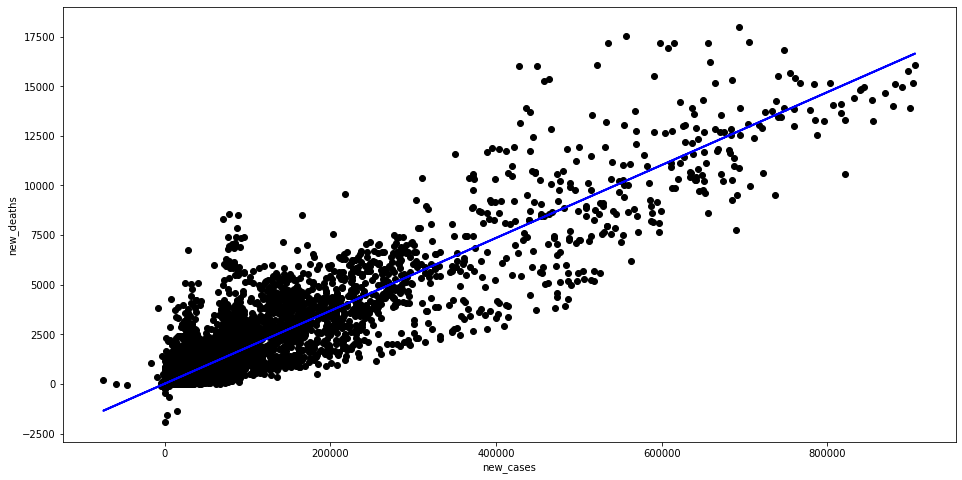

In [ ]:
X = data['new_cases'].values.reshape(-1,1)
y = data['new_deaths'].values.reshape(-1,1)

#Applying Linear Regression
reg = LinearRegression()
reg.fit(X, y)
r_sq = reg.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)

predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("new_cases")
plt.ylabel("new_deaths")
plt.show()


Prediction of total death Vs total cases 

The linear model is: Y = 2258.0 + 0.021727X


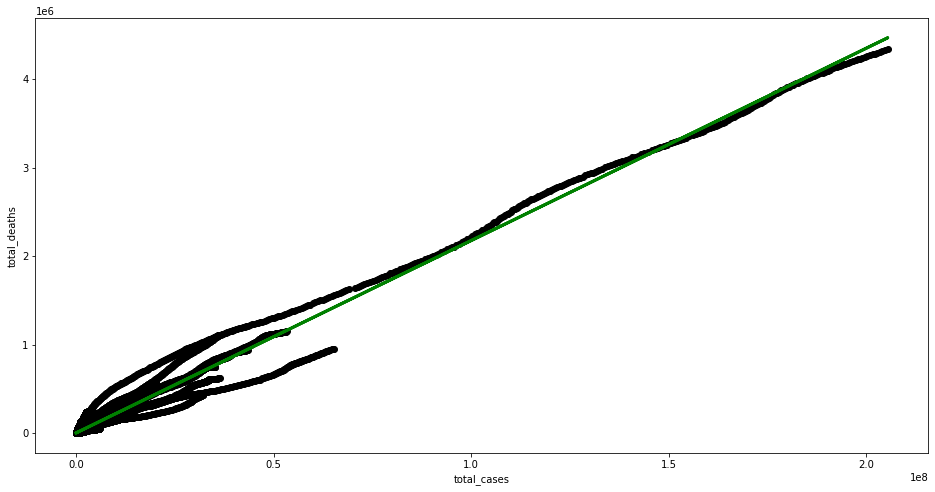

In [ ]:
X = data['total_cases'].values.reshape(-1,1)
y = data['total_deaths'].values.reshape(-1,1)
#Applying Linear Regression
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='green',
    linewidth=3
)
plt.xlabel("total_cases")
plt.ylabel("total_deaths")
plt.show()